In [2]:
import pandas as pd

draft_data_path = "/Users/kareemkassamia/Downloads/draft-data-20-years.csv"
nba_stats_path = "/Users/kareemkassamia/Downloads/2023-2024 NBA Player Stats - Regular.csv"

nba_stats = pd.read_csv(nba_stats_path, encoding='ISO-8859-1')

draft_data_info = draft_data.head()
nba_stats_info = nba_stats.head()

draft_data_info, nba_stats_info



(   Unnamed: 0  Rk  Pk   Tm              Player       College   Yrs       G  \
 0           1   1   1  BRK     Derrick Coleman      Syracuse  15.0   781.0   
 1           2   2   2  OKC         Gary Payton  Oregon State  17.0  1335.0   
 2           3   3   3  DEN  Mahmoud Abdul-Rauf           LSU   9.0   586.0   
 3           4   4   4  ORL        Dennis Scott  Georgia Tech  10.0   629.0   
 4           5   5   5  CHA        Kendall Gill      Illinois  15.0   966.0   
 
      TOTMP   TOTPTS  ...  WS/48  BPM  VORP  DraftYr   MPG   PPG  RPG  APG  \
 0  25903.0  12884.0  ...  0.119  1.4  22.3     1990  33.2  16.5  9.3  2.5   
 1  47117.0  21813.0  ...  0.148  3.3  62.5     1990  35.3  16.3  3.9  6.7   
 2  15628.0   8553.0  ...  0.077 -0.8   4.5     1990  26.7  14.6  1.9  3.5   
 3  17983.0   8094.0  ...  0.089  0.2   9.9     1990  28.6  12.9  2.8  2.1   
 4  29481.0  12914.0  ...  0.078  0.1  15.8     1990  30.5  13.4  4.1  3.0   
 
                                            playerurl 

In [3]:
# Standardize player names for merging
draft_data['Player'] = draft_data['Player'].str.lower()
nba_stats['Player'] = nba_stats['Player'].str.lower()

# Merge the datasets on player names
merged_data = pd.merge(draft_data, nba_stats, on='Player', how='inner', suffixes=('_NCAA', '_NBA'))

# Display the first few rows of the merged dataset
merged_data_info = merged_data.head()

# Display the column names to understand the structure post-merge
merged_data_columns = merged_data.columns

merged_data_info, merged_data_columns


(   Unnamed: 0  Rk_NCAA  Pk Tm_NCAA        Player      College   Yrs  G_NCAA  \
 0         732        1   1     CLE  lebron james          NaN  19.0  1351.0   
 1         852        4   4     NOP    chris paul  Wake Forest  17.0  1148.0   
 2         932       24  24     MEM    kyle lowry    Villanova  16.0  1006.0   
 3         943       35  35     TOR   p.j. tucker        Texas  11.0   758.0   
 4         943       35  35     TOR   p.j. tucker        Texas  11.0   758.0   
 
      TOTMP   TOTPTS  ...  FT%_NBA  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
 0  51563.0  36559.0  ...    0.737  0.9  6.4  7.3  7.8  1.3  0.6  3.2  1.2   
 1  39673.0  20844.0  ...    0.833  0.3  3.5  3.8  7.2  1.1  0.1  1.2  1.8   
 2  32057.0  14882.0  ...    0.833  0.7  2.8  3.5  4.0  1.1  0.4  1.4  2.5   
 3  22037.0   5438.0  ...    1.000  1.1  1.8  2.9  0.5  0.6  0.2  0.3  2.3   
 4  22037.0   5438.0  ...    0.000  0.3  4.3  4.7  0.0  1.0  0.7  0.7  3.0   
 
     PTS  
 0  24.8  
 1   8.9  
 2   8.2  
 3  

In [4]:
# Remove duplicates
merged_data = merged_data.drop_duplicates()

# Handle missing values 
merged_data = merged_data.dropna()

# Select relevant features for prediction and clustering
selected_features = ['PPG', 'RPG', 'APG', 'MPG', 'TOTMP', 'TOTPTS', 'TOTTRB', 'TOTAST']
target_features = ['PTS', 'TRB', 'AST', 'MP']

# Filter the dataset to include only the selected features
X = merged_data[selected_features]
y = merged_data[target_features]

# Display the filtered dataset
X_info = X.head()
y_info = y.head()

X_info, y_info


(    PPG  RPG  APG   MPG    TOTMP   TOTPTS  TOTTRB   TOTAST
 1  18.2  4.5  9.5  34.6  39673.0  20844.0  5182.0  10894.0
 2  14.8  4.4  6.3  31.9  32057.0  14882.0  4403.0   6359.0
 3   7.2  5.7  1.5  29.1  22037.0   5438.0  4291.0   1109.0
 4   7.2  5.7  1.5  29.1  22037.0   5438.0  4291.0   1109.0
 5   7.2  5.7  1.5  29.1  22037.0   5438.0  4291.0   1109.0,
    PTS  TRB  AST    MP
 1  8.9  3.8  7.2  27.6
 2  8.2  3.5  4.0  28.0
 3  1.3  2.9  0.5  15.9
 4  2.0  4.7  0.0  22.0
 5  1.2  2.4  0.7  14.4)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(21.23435429999687, 0.5586676080949342)

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf



(21.86518792250055, 0.517525825718635)

In [8]:
# Add player names and draft picks to the clustered DataFrame
predicted_df['Player'] = merged_data.loc[y_test.index, 'Player'].values
predicted_df['Pick'] = merged_data.loc[y_test.index, 'Pk'].values

# Reorder the columns for better readability
predicted_df = predicted_df[['Player', 'Pick', 'PTS', 'TRB', 'AST', 'MP', 'Cluster']]

# Display the first few rows of the enriched clustered data
predicted_df_info = predicted_df.head()

predicted_df_info


,Player,Pick,PTS,TRB,AST,MP,Cluster
0,damian lillard,6,25.208601,5.078584,6.738754,38.777607,2
1,thaddeus young,12,8.126656,3.297841,1.589490,20.731944,3
2,tyler herro,13,17.669393,4.509325,4.006611,29.409053,1
3,og anunoby,23,10.312014,3.530473,1.648952,23.985162,3
4,mason plumlee,22,5.208434,4.773345,2.251426,16.100519,0


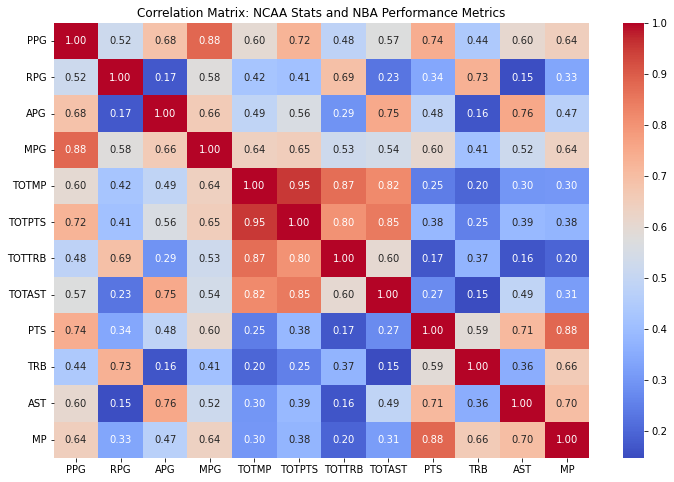

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = merged_data[selected_features + target_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: NCAA Stats and NBA Performance Metrics')
plt.show()


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Initialize different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model using cross-validation
model_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    model_scores[name] = scores.mean()

# Perform residual analysis for the best performing model
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

# Display model comparison scores and residual analysis
model_scores, residuals.head()


({'Linear Regression': 0.11316878655200102,
  'Decision Tree Regressor': -0.20815141335300585,
  'Random Forest Regressor': 0.3501866186951352},
           PTS       TRB       AST       MP
 54   0.941000 -0.416000  0.229000  1.62000
 10  -4.653000 -1.137000  0.182000 -9.56700
 231  3.813583  0.812500  0.174750  4.26775
 160  1.235900  0.625600 -0.918800  3.36460
 73   1.728833  2.597667 -0.980667  3.22050)

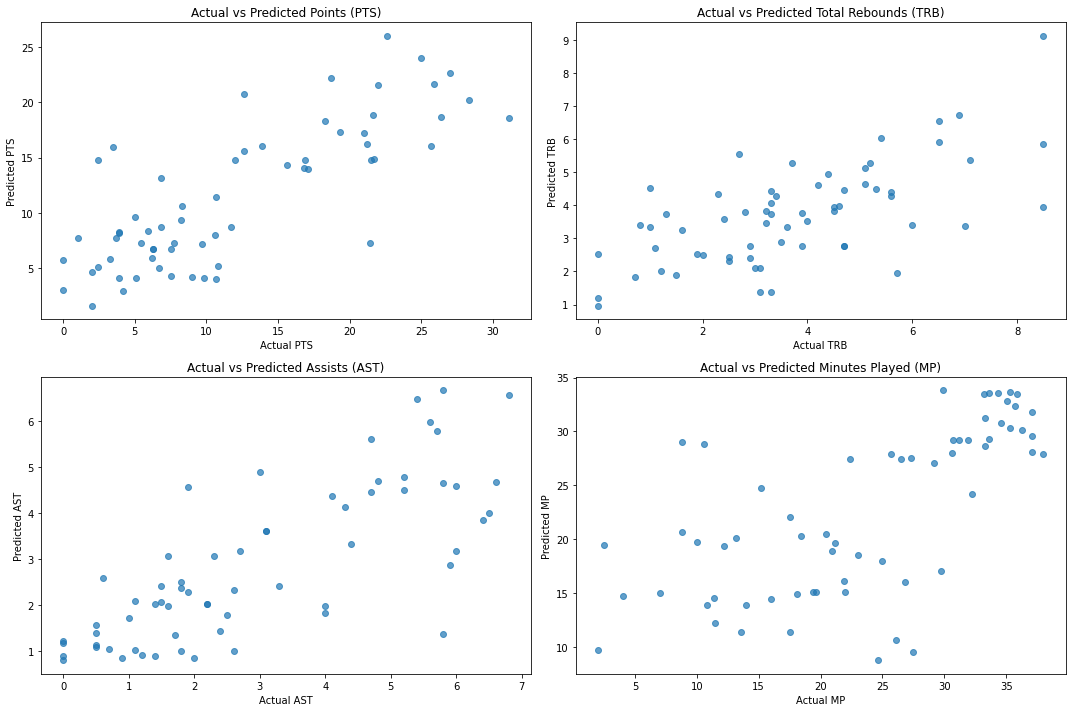

In [19]:
# Scatter plot to illustrate the relationship between predicted and actual NBA performance metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot for Points (PTS)
axs[0, 0].scatter(y_test['PTS'], y_pred_best[:, 0], alpha=0.7)
axs[0, 0].set_title('Actual vs Predicted Points (PTS)')
axs[0, 0].set_xlabel('Actual PTS')
axs[0, 0].set_ylabel('Predicted PTS')

# Scatter plot for Total Rebounds (TRB)
axs[0, 1].scatter(y_test['TRB'], y_pred_best[:, 1], alpha=0.7)
axs[0, 1].set_title('Actual vs Predicted Total Rebounds (TRB)')
axs[0, 1].set_xlabel('Actual TRB')
axs[0, 1].set_ylabel('Predicted TRB')

# Scatter plot for Assists (AST)
axs[1, 0].scatter(y_test['AST'], y_pred_best[:, 2], alpha=0.7)
axs[1, 0].set_title('Actual vs Predicted Assists (AST)')
axs[1, 0].set_xlabel('Actual AST')
axs[1, 0].set_ylabel('Predicted AST')

# Scatter plot for Minutes Played (MP)
axs[1, 1].scatter(y_test['MP'], y_pred_best[:, 3], alpha=0.7)
axs[1, 1].set_title('Actual vs Predicted Minutes Played (MP)')
axs[1, 1].set_xlabel('Actual MP')
axs[1, 1].set_ylabel('Predicted MP')

plt.tight_layout()
plt.show()


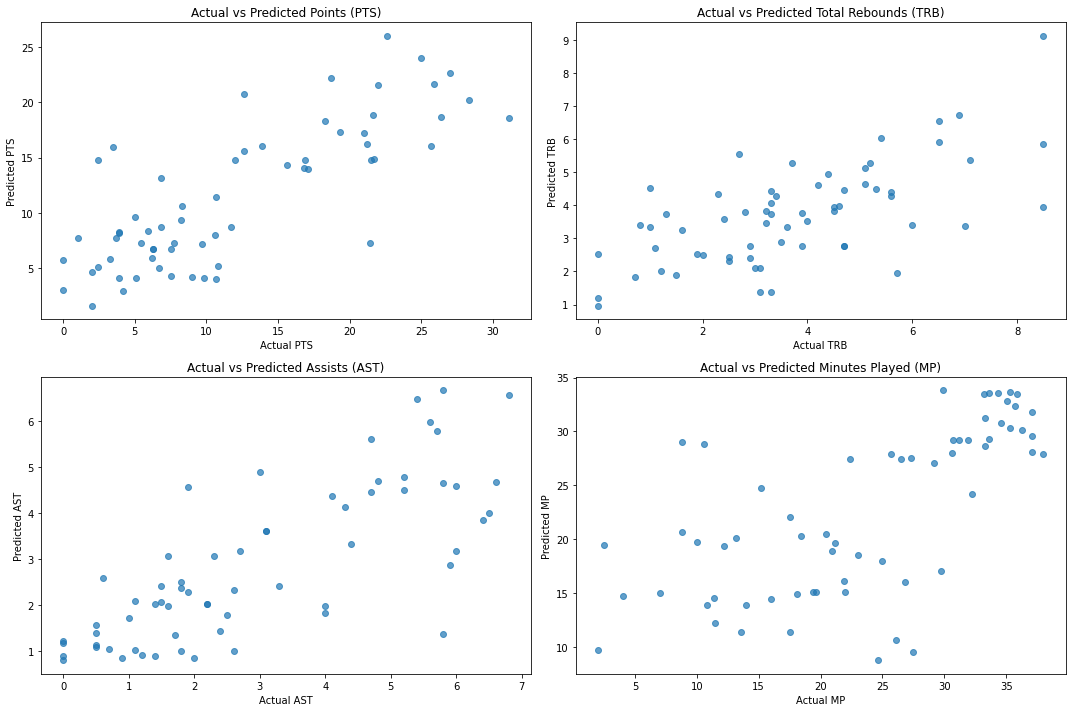

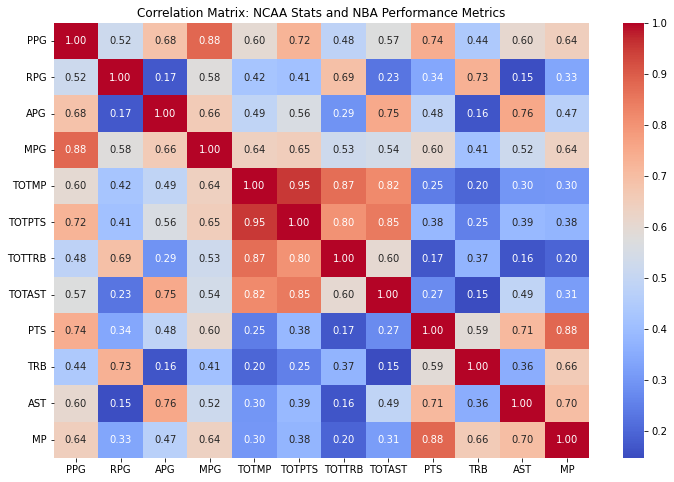

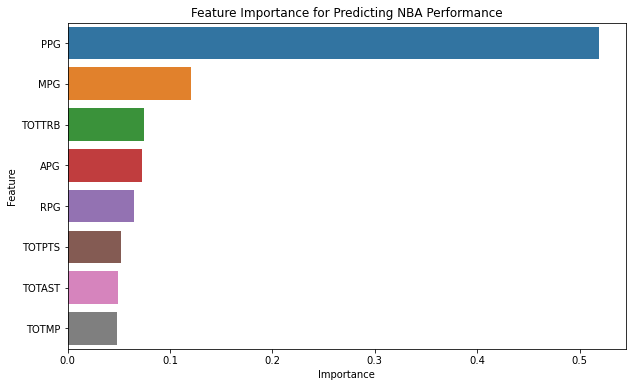

In [18]:
# Model building and evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

model_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    model_scores[name] = scores.mean()

best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Define the bust criterion
bust_criterion = (y_pred_best[:, 0] < 0.5 * X.loc[y_test.index, 'PPG']).astype(int)
predicted_df['Bust'] = bust_criterion
predicted_df['NCAA_PPG'] = X.loc[y_test.index, 'PPG'].values

# Perform K-means clustering with 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=42)
clusters_8 = kmeans_8.fit_predict(y_pred_best)
predicted_df['Cluster_8'] = clusters_8

# Visualizations
# Scatter plots for actual vs predicted
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].scatter(y_test['PTS'], y_pred_best[:, 0], alpha=0.7)
axs[0, 0].set_title('Actual vs Predicted Points (PTS)')
axs[0, 0].set_xlabel('Actual PTS')
axs[0, 0].set_ylabel('Predicted PTS')

axs[0, 1].scatter(y_test['TRB'], y_pred_best[:, 1], alpha=0.7)
axs[0, 1].set_title('Actual vs Predicted Total Rebounds (TRB)')
axs[0, 1].set_xlabel('Actual TRB')
axs[0, 1].set_ylabel('Predicted TRB')

axs[1, 0].scatter(y_test['AST'], y_pred_best[:, 2], alpha=0.7)
axs[1, 0].set_title('Actual vs Predicted Assists (AST)')
axs[1, 0].set_xlabel('Actual AST')
axs[1, 0].set_ylabel('Predicted AST')

axs[1, 1].scatter(y_test['MP'], y_pred_best[:, 3], alpha=0.7)
axs[1, 1].set_title('Actual vs Predicted Minutes Played (MP)')
axs[1, 1].set_xlabel('Actual MP')
axs[1, 1].set_ylabel('Predicted MP')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = merged_data[selected_features + target_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: NCAA Stats and NBA Performance Metrics')
plt.show()

# Feature importance plot
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting NBA Performance')
plt.show()
